<a href="https://colab.research.google.com/github/hsnam95/my/blob/main/Word%20Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Word Cloud Formation

In [14]:
# Import packages/libraries
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import collections
import pandas as pd
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string

# Bring in df
df = pd.read_excel("./df.xlsx")

# Bring in string punctuation

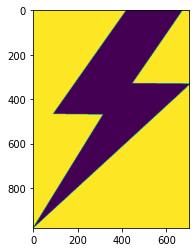

In [15]:
# Delete "photo" object (to debug mask)
#del(photo)

# Bring in mask data
photo = Image.open("./Thunderbolt.jpg")
mask = np.array(photo)

plt.imshow(photo)

Prepare format of words for word cloud

In [16]:
# Lists in df currently strings - remove double quotes
df['WordCloudText']=df['WordCloudText'].apply(lambda x: x.strip('][').split(', '))

In [17]:
# Create Dictionary and list
wordcount={}
list = []

# Get Words Ready
for x in df.WordCloudText:
    list.extend(x)

In [ ]:
# Clean text
textcount=str(list).split()
textcount=[''.join(c for c in s if c not in string.punctuation) for s in textcount] #Remove punctuation

# Wordcount Loop
# If the word is not in the stop words, it's added to the dictionary with a count.
# If the word already exists in the dictionary, the count is made one higher.

for word in textcount:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Clean messy words out of dictionary - FOR HP ONLY
#del wordcount['¨c']
#del wordcount['—']
#del wordcount['ter']
    
# Printing 20 Most Common words in "Harry Potter"
Counts = collections.Counter(wordcount)

for word, count in Counts.most_common(250):
    print(word, ": ", count)

Create wordcloud

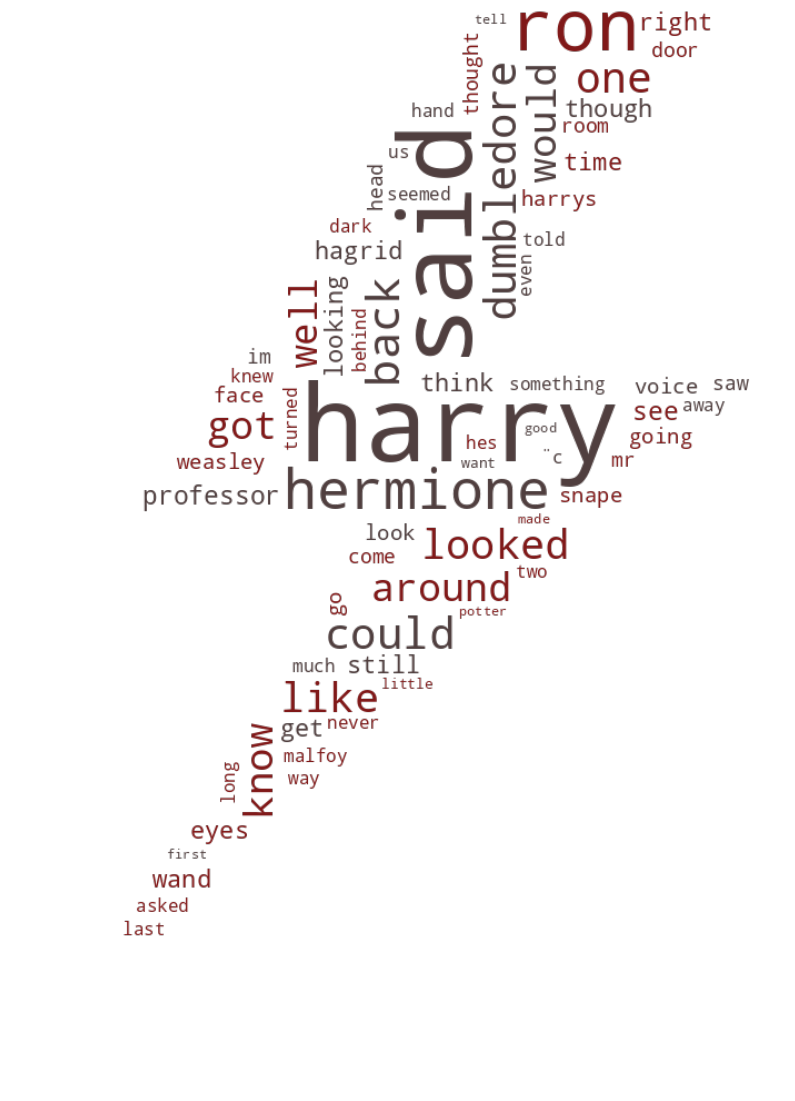

In [24]:
# Create Color Maps
# Converted HTML/HEX colors to RGB using: https://htmlcolorcodes.com/
colorsList = ['#503F3F', '#801919'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=mask, margin=10, min_font_size=12, max_words=500, 
                      random_state=1, colormap=ColorMap, background_color=None, mode='RGBA').generate_from_frequencies(wordcount)

# Display the generated image:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save image to file
wordcloud.to_file("./HP_WordCloud.png")

### Creating the Final WordCloud Image

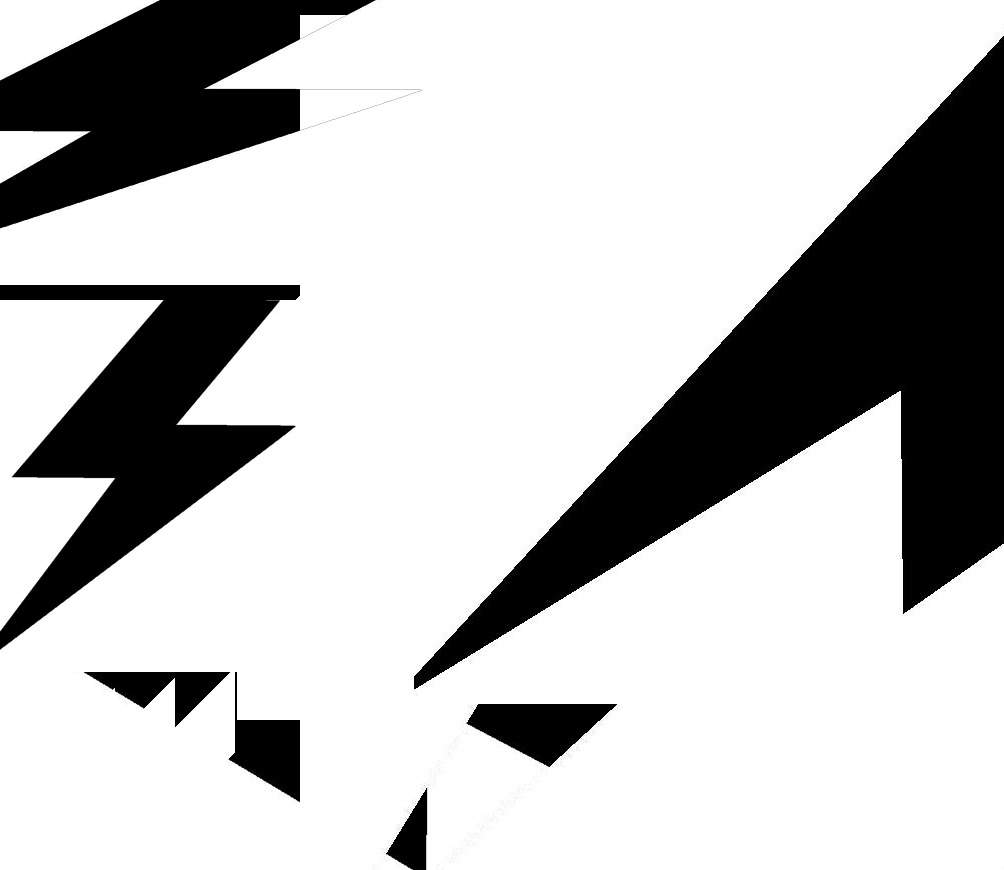

In [26]:
# Bringing in background parchment and cropping
layer1 = Image.open("./Thunderbolt.jpg")
layer1 = layer1.crop((100,0,1216,1100))

# Bringing in WordCloud and cropping
layer2 = Image.open("./Thunderbolt.jpg")
layer2 = layer2.crop((0,0,704,870))

# Transposing parchment to portrait, resizing to match wordcloud, and converting type
layer1 = layer1.transpose(Image.ROTATE_90)
layer1 = layer1.resize((1004,870))
layer1 = layer1.convert('RGBA')

# Adding footsteps to parchment
shoes = Image.open("./Thunderbolt.jpg")
shoes = shoes.convert('RGBA')
shoes2 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes2 = shoes2.transpose(Image.ROTATE_270)
shoes3 = shoes.crop((0,0,184,177))
shoes3 = shoes3.transpose(Image.ROTATE_90)
shoes3 = shoes3.rotate(-45)
shoes4 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes4 = shoes4.transpose(Image.ROTATE_270)
shoes4 = shoes4.crop((0, 40,177,300))
shoes5 = shoes4.crop((40,100,100,300))
shoes5 = shoes5.rotate(-45)
shoes6 = shoes5

# Adding Maurader's Map Castle and logo
Maurader = Image.open("./Thunderbolt.jpg")
Maurader = Maurader.convert('RGBA')
Maurader = Maurader.resize((int(355*.92),int(405*.92)))
MauraderLogo = Image.open("./Thunderbolt.jpg")
MauraderLogo = MauraderLogo.resize((int(688*.87),int(340*.87)))

# Compiling into one final image
final2 = Image.new("RGBA", layer1.size) # Creates new image
final2.paste(layer1, (0,0), layer1)
final2.paste(layer2, (300, 15), layer2)
final2.paste(shoes, (710, 700), shoes)
final2.paste(shoes2, (390, 0), shoes2)
final2.paste(shoes3, (260, 280), shoes3)
final2.paste(shoes4, (237, 460), shoes4)
final2.paste(shoes5, (175, 640), shoes5)
final2.paste(shoes6, (115, 650), shoes6)
final2.paste(shoes6, (55, 660), shoes6)
final2.paste(shoes6, (-5, 670), shoes6)
final2.paste(MauraderLogo, (-175, -10), MauraderLogo)
final2.paste(Maurader, (-30, 300), Maurader)
final2.show()

# Saving image
final2.save('./HP_WordCloud_FINAL.png')

Which characters were mentioned most?

In [27]:
characters = ['harry', 'ron', 'hermione', 'sirius', 'luna', 'fred', 'george', 'cedric',
              'percy','voldemort', 'tom', 'peter', 'dumbledore', 'lupin', 'snape', 'trelawney', 'malfoy', 'hagrid',
              'crabbe', 'goyle', 'lockhart', 'mcgonagall','cho', 'ginny','dobby','moody','neville', 'lavender', 'colin',
             'dudley', 'vernon', 'petunia', 'lily', 'james','hooch', 'dean', 'seamus', 'viktor', 'fleur', 'charlie',
             'lockhart', 'narcissa', 'bellatrix', 'lucius', 'draco', 'pomfrey', 'quirrell', 'sprout', 'myrtle', 'umbridge',
             'molly', 'arthur', 'oliver']
CharDictionary = {x:wordcount[x] for x in characters}

Counts = collections.Counter(CharDictionary)

for word, count in Counts.most_common(15):
    print(word, ": ", count)

harry :  14034
ron :  5055
hermione :  4132
dumbledore :  2446
hagrid :  1452
snape :  1268
malfoy :  1014
voldemort :  824
fred :  774
sirius :  691
george :  630
lupin :  627
ginny :  579
mcgonagall :  570
neville :  514


Which spell-related words were mentioned most?

In [28]:
spells = ['alohomora', 'stupefy','avada','kedavra','riddikulus', 'obliviate', 'sectumsempra', 'lumos', 'expelliarmus',
         'wingardium', 'leviosa', 'accio', 'expecto', 'patronum', 'imperio', 'aguamenti', 'confundo', 'engorgio',
         'revelio', 'muffliato', 'reparo', 'petrificus', 'totalus', 'protego', 'reducio', 'scourgify']
SpellDictionary = {x:wordcount[x] for x in spells}

Counts = collections.Counter(SpellDictionary)

for word, count in Counts.most_common(10):
    print(word, ": ", count)

expecto :  39
patronum :  31
accio :  21
avada :  17
expelliarmus :  15
kedavra :  14
lumos :  13
riddikulus :  12
muffliato :  11
sectumsempra :  8
